In [4]:
#!pip install sounddevice

     |████████████████████████████████| 107 kB 2.2 MB/s eta 0:00:01


In [26]:
import sounddevice as sd
import numpy as np
from scipy.io import wavfile
from scipy import signal

##this records, and if we gotta make some test data we do it here. 
sample_rate=24000
duration = 5  # seconds
myrecording = sd.rec(duration * sample_rate, samplerate=sample_rate, channels=1,dtype='float64')
print("Recording Audio")
sd.wait()
print("Audio recording complete , Play Audio")
sd.play(myrecording, sample_rate)
sd.wait()


Recording Audio
Audio recording complete , Play Audio


In [35]:
frequencies, times, spectrogram = signal.spectrogram(myrecording.squeeze(), sample_rate)

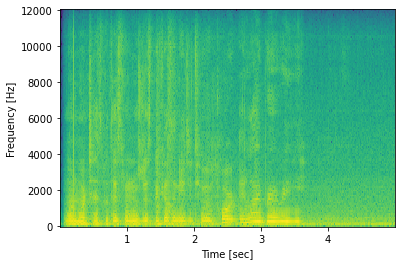

In [38]:
import matplotlib.pyplot as plt


plt.pcolormesh(times, frequencies, np.log(spectrogram)) ##log makes it prettier. for whatever reason.
#plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [39]:
spectrogram.shape

(129, 535)

In [21]:
sd.play(myrecording, sample_rate)

In [65]:
##24000 is what our data is, don't change that

##blocksize is how often this thing dumps into the audio_data pool.  output window is for our model


def stream_microphone(duration=5, sample_rate=24000, channels=1,blocksize = 1000000, output_window = 1000):
    """
    Stream audio from the microphone for a given duration.

    Args:
        duration (float): Duration of the audio stream in seconds (default: 10).
        sample_rate (int): Sampling rate in Hz (default: 44100).
        channels (int): Number of audio channels (default: 1).

    Returns:
        numpy.ndarray: An array of shape (samples, channels) containing the audio data.
    """
    # Calculate the number of samples based on the duration and sample rate.
    num_samples = int(duration * sample_rate)

    # Create an empty numpy array to store the audio data.
    audio_data = np.empty((num_samples, channels), dtype=np.float32)
    
    # Define the audio stream callback function.
    def callback(indata, frames, time, status):
        """
        This function will be called by the sounddevice library for each audio block.

        Args:
            indata (numpy.ndarray): An array of shape (blocksize, channels) containing the audio data.
            frames (int): The number of frames in the audio block.
            time (sounddevice.CallbackTimeInfo): Timestamps indicating the audio block's input/output time.
            status (sounddevice.CallbackFlags): Indicates any errors that occurred during audio stream.
        """
        if status:
            print('Error:', status)
        audio_data[len(audio_data) - frames:len(audio_data)] = indata
        print(indata.shape)
        ###use the output window here, get the last x from audio_data, convert to spectrogram, and make inference

    # Start the audio stream.
    with sd.InputStream(channels=channels, samplerate=sample_rate, blocksize=blocksize, callback=callback):
        print(f"Recording {duration} seconds of audio...")
        #sd.sleep(int(duration * 1000))

    return audio_data


In [66]:
data = stream_microphone()

Recording 5 seconds of audio...


In [67]:
data.shape

(120000, 1)

In [68]:
sd.play(data, sample_rate)